In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set(style="ticks")
print("Setup Complete")

Setup Complete


# Context

In [14]:
def determine_age_range(age):
    if 0 < age <= 10:
        return 1
    elif 10 < age <= 20:
        return 2
    elif 20 < age <= 30:
        return 3
    elif 30 < age <= 40:
        return 4
    elif 40 < age <= 50:
        return 5
    elif 50 < age <= 60:
        return 6
    elif 60 < age < 90:
        return 7
    else:
        return np.nan
        
pd.set_option('display.max_rows', 20)
sample = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
age_ranges = train['Age'].apply(determine_age_range)
age_ranges.name = 'Age Ranges'
train = train.merge(age_ranges, left_index=True, right_index=True)
display(train)
# pd.set_option('display.max_rows', None)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Ranges
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1.0
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,2.0
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,7.0
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,7.0
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,4.0
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,6.0


# Data quality assessment

In [4]:
assert all(train['PassengerId'] == np.arange(10 ** 5)), 'PassengerId must be in the range from 0 to 100000 inclusive'
assert all(train['Survived'].apply(lambda survived: survived in [0, 1])), 'Survived must have a value equal to 0 or 1'
assert all(train['Pclass'].apply(lambda pclass: pclass in range(1, 4))), \
'Pclass must have a value in the range from 1 to 3 inclusive'
assert all(train['Name'].str.contains('[A-Z]{1}[a-z]*, [A-Z]{1}[a-z]*', regex=True)), 'The Name must match the template'
assert all(train['Sex'].apply(lambda gender: gender in ['male', 'female'])), 'The Sex must be equal to either male or female'
assert all(train['Age'].astype(str).str.contains('\d\d?.\d\d?|nan', regex=True)), \
'Age must match the presented template and is equal to NaN'
assert all(train['SibSp'].apply(lambda sibsp: sibsp in range(9))), 'SubSp is not in the acceptable range'
assert all(train['Parch'].apply(lambda parch: parch in range(10))), 'Parch is not in the acceptable range'
assert all(train['Ticket'].astype(str).str.contains(
    '\d{4,5}|[A-Z].[A-Z5].?|[A-Z4]{2}.?|A/[4,5]|SOTON/O.Q.|W./C.|SC/PARIS|C|nan', regex=True)), \
'''Ticket must match one of the templates:
4 digits, 5 digits, letter.letter, 2 letters, A.5., A4., A/4, A/5, SOTON/O.Q., W./C., SC/PARIS, C'''
assert all(train['Cabin'].astype(str).str.contains('[A-GT]\d{4,5}|nan', regex=True)), \
'Cabin must match one of the templates: letter from A to G or T and 4 or 5 digits'
assert all(train['Embarked'].astype(str).apply(lambda embarked: embarked in ['C', 'Q', 'S', 'nan'])), \
'Embarked must be equal to C, Q, S or NaN'

train['PassengerId'] = train['PassengerId'].dropna().astype(np.int64)
train['Survived'] = train['Survived'].dropna().astype(np.int64)
train['Pclass'] = train['Pclass'].dropna().astype(np.int64)
train['Name'] = train['Name'].dropna().astype(str)
train['Sex'] = train['Sex'].dropna().astype(str)
train['Age'] = train['Age'].dropna().astype(np.float64)
train['SibSp'] = train['SibSp'].dropna().astype(np.int64)
train['Parch'] = train['Parch'].dropna().astype(np.int64)
train['Ticket'] = train['Ticket'].dropna().astype(str)
train['Fare'] = train['Fare'].dropna().astype(np.float64)
train['Cabin'] = train['Cabin'].dropna().astype(str)
train['Embarked'] = train['Embarked'].dropna().astype(str)
train['Age Ranges'] = train['Age Ranges'].dropna().astype(int)

print('The testing was completed successfully')
display(train)

The testing was completed successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Ranges
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,1.0
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,2.0
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,7.0
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,7.0
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,4.0
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S,6.0


# Data exploration

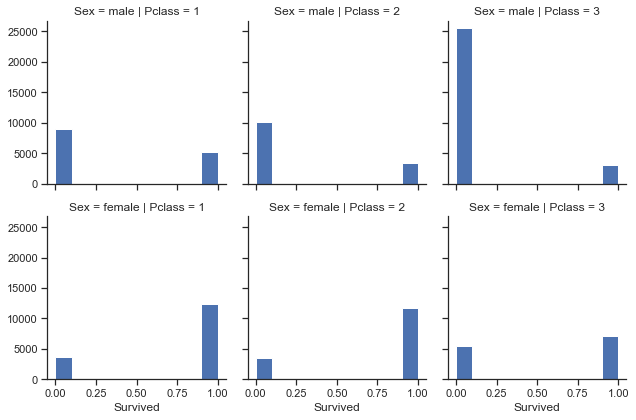

In [6]:
# Исследование зависимости выживаемости от класса обслуживания и пола
# Самый высокий процент гибели у мужчин 3 класса
graph = sns.FacetGrid(data=train, col='Pclass', row='Sex')
graph.map(plt.hist, 'Survived');

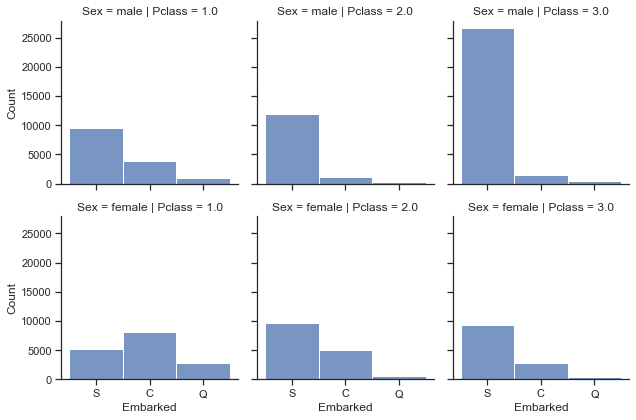

In [204]:
graph = sns.FacetGrid(data=train, col='Pclass', row='Sex')
graph.map(sns.histplot, 'Embarked');
# У большинства мужчин и женщин порт посадки - Southampton, очень малое количество 3 класса село в Queenstown составляют женщины 1 класса, 1 класс также составляет основную часть севших в Cherbourg
# Большую часть тех, кто сел в Queenstown составляют женщины 1 класса, 1 класс также составляет основную часть севших в Cherbourg

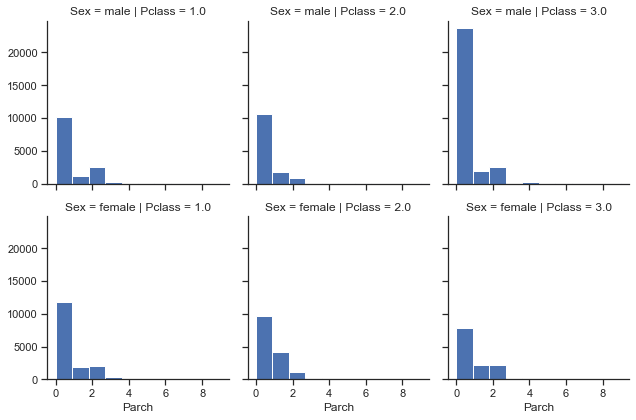

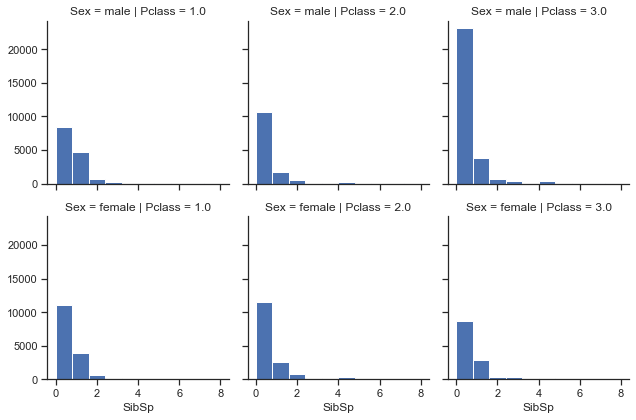

In [205]:
graph = sns.FacetGrid(data=train, col='Pclass', row='Sex')
graph.map(plt.hist, 'Parch');
graph = sns.FacetGrid(data=train, col='Pclass', row='Sex')
graph.map(plt.hist, 'SibSp');
# Как видно из приведенных гистограмм более 20000 одиноких мужчин 3 класса сели в Southampton и имели наибольший процент гибели

<AxesSubplot:xlabel='Age Ranges', ylabel='Count'>

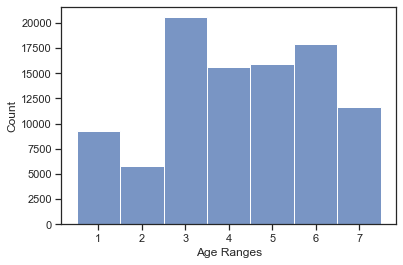

In [241]:
sns.histplot(train, x='Age Ranges', discrete=True)
# большинству пассажиров от 20 до 30 лет

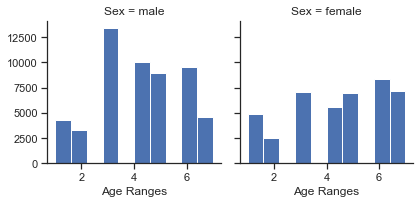

In [242]:
graph = sns.FacetGrid(data=train, col='Sex')
graph.map(plt.hist, 'Age Ranges');
'''
1 - дети до 10 лет
2 - от 10 до 20
3 - от 20 до 30
4 - от 30 до 40
5 - от 40 до 50
6 - от 50 до 60
7 - от 60 до 90
'''

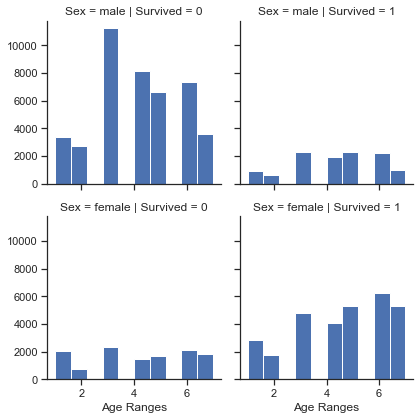

In [243]:
graph = sns.FacetGrid(data=train, col='Survived', row='Sex')
graph.map(plt.hist, 'Age Ranges');
# большая часть мужчин от 20 до 30 лет погибло

744.66

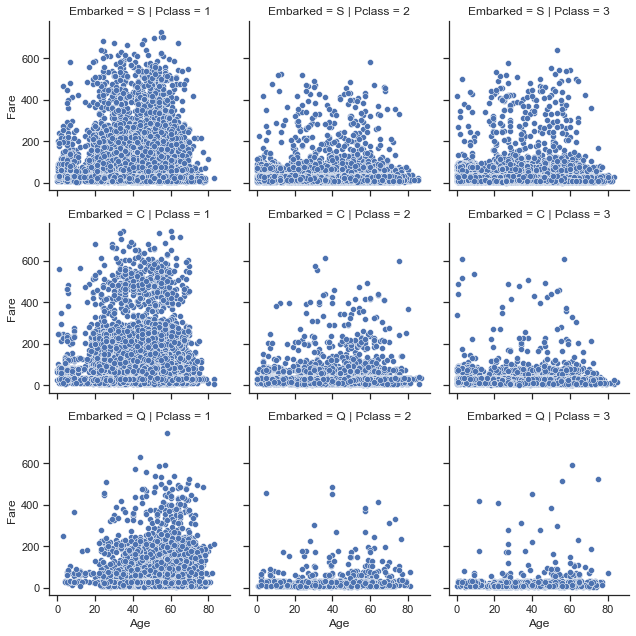

In [263]:
graph = sns.FacetGrid(data=train, col='Pclass', row='Embarked')
graph.map(sns.scatterplot, 'Age', 'Fare');
# Билеты из Квинстауна брались, в основном, за цену меньше 250 фунтов стерлингов (£)

56.962512914199415

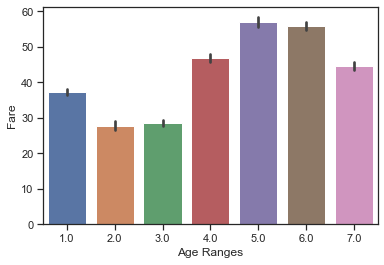

In [52]:
sns.barplot(data=train, x='Age Ranges', y='Fare')

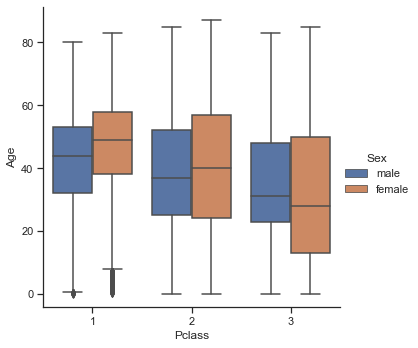

In [60]:
sns.catplot(data=train, x='Pclass', y='Age', hue='Sex', kind='box')
# На диаграмме видно увеличение среднего возраста с увеличением класса

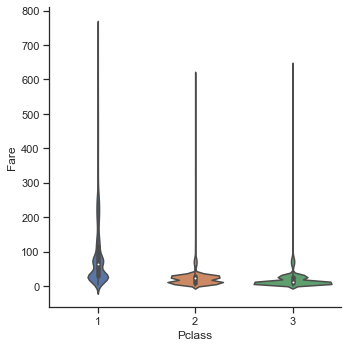

In [67]:
sns.catplot(data=train, x='Pclass', y='Fare', kind='violin')
# распределение цен относительно класса

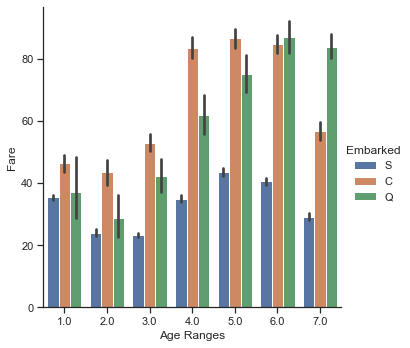

In [76]:
sns.catplot(data=train, x='Age Ranges', y='Fare', hue='Embarked', kind='bar')
# средние цены в разных портах по возрастам

# Summary

In [ ]:
'''
Таким образом, проанализировав представленный набор данных, мне удалось отобразить закономерность цены билета от порта посадки,
а также найти определенную группу пассажиров, путешествующих без родственников из Саутгемптона, в возрасте преимущественно
от 20 до 30 и от 50 до 60 лет, данная группа имеет самый высокий процент смертности.
Также мне удалось определить, что люди в возрасте от 40 до 60 лет покупали самые высокие по среднему значению билеты
Меньше всего на борту было детей и подростков до 20 лет. Стоит отметить, что меньше всего пассажиров было из Квинстауна,
-большая часть которых получила билеты 1 класса, большинство билетов 2 и 3 класса из всех портов не превышает цену в 200 фунтов.
'''